<a href="https://colab.research.google.com/github/sandrazuniga/Challenge_TelecomX_Parte2/blob/main/TelecomX_Parte2_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom X - Análisis de Evasión de Clientes

La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

El ánalisis contiene:

Importación y manipulación de datos desde una API.
Aplicación de los conceptos de ETL (Extracción, Transformación y Carga) en la preparación de los datos.
Creación de visualizaciones estratégicas para identificar patrones y tendencias.
Análisis Exploratorio de Datos (EDA) e informe con insights relevantes.

#📌 Extracción

In [422]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.lines import Line2D
import seaborn as sns
import requests
import json

In [423]:
url = 'https://raw.githubusercontent.com/sandrazuniga/Challenge_TelecomX_Parte2/refs/heads/main/TelecomX_Data.json'

df = pd.read_json(url)

In [424]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformación

In [426]:
# Paso 1: Normalizar columnas anidadas
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Paso 2: Eliminar las columnas anidadas originales del DataFrame
df.drop(columns=['customer', 'phone', 'internet', 'account'], inplace=True)

# Paso 3: Concatenar el DataFrame original con los nuevos datos normalizados
df = pd.concat([df, customer_df, phone_df, internet_df, account_df], axis=1)

# Paso 4: Verificar los cambios
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [427]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [428]:

df.rename(columns={
    'customerID': 'ID',
    'Churn':'cancelo',
    'gender': 'genero',
    'SeniorCitizen': 'mayor_de_65',
    'Partner': 'tiene_pareja',
    'Dependents': 'tiene_dependentes',
    'tenure': 'meses_de_contrato',
    'PhoneService': 'servicio_telefonico',
    'MultipleLines': 'lineas_multiples',
    'InternetService': 'servicio_internet',
    'OnlineSecurity': 'seguridad_en_linea',
    'OnlineBackup': 'Soporte_en_linea',
    'DeviceProtection': 'proteccion_dispositivos',
    'TechSupport': 'soporte_tecnico',
    'StreamingTV': 'servicio_tv',
    'StreamingMovies': 'servicio_peliculas',
    'PaperlessBilling': 'facturas_electronicas',
    'PaymentMethod': 'metodo_pago',
    'Contract': 'tipo_contrato',
    'Charges.Monthly': 'gastos_mensuales',
    'Charges.Total': 'gastos_totales'
}, inplace=True)

In [429]:
df.head()

,ID,cancelo,genero,mayor_de_65,tiene_pareja,tiene_dependentes,meses_de_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,Soporte_en_linea,proteccion_dispositivos,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,metodo_pago,gastos_mensuales,gastos_totales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [430]:
df.isnull().sum()

,0
ID,0
cancelo,0
genero,0
mayor_de_65,0
tiene_pareja,0
tiene_dependentes,0
meses_de_contrato,0
servicio_telefonico,0
lineas_multiples,0
servicio_internet,0


In [431]:
(df['cancelo'] == '').sum()

np.int64(224)

In [432]:
(df['gastos_totales'] == ' ').sum()

np.int64(11)

In [433]:
df['cancelo'] = df['cancelo'].replace('', np.nan)
df['gastos_totales'] = df['gastos_totales'].replace(' ', np.nan)

In [434]:
(df['cancelo'] == '').sum()
(df['gastos_totales'] == ' ').sum()

np.int64(0)

In [435]:
df.isnull().sum()

,0
ID,0
cancelo,224
genero,0
mayor_de_65,0
tiene_pareja,0
tiene_dependentes,0
meses_de_contrato,0
servicio_telefonico,0
lineas_multiples,0
servicio_internet,0


In [436]:
df = df.dropna(subset=['cancelo', 'gastos_totales'])

In [437]:
df[['cancelo', 'gastos_totales']].isnull().sum()

,0
cancelo,0
gastos_totales,0


In [438]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       7032 non-null   object 
 1   cancelo                  7032 non-null   object 
 2   genero                   7032 non-null   object 
 3   mayor_de_65              7032 non-null   int64  
 4   tiene_pareja             7032 non-null   object 
 5   tiene_dependentes        7032 non-null   object 
 6   meses_de_contrato        7032 non-null   int64  
 7   servicio_telefonico      7032 non-null   object 
 8   lineas_multiples         7032 non-null   object 
 9   servicio_internet        7032 non-null   object 
 10  seguridad_en_linea       7032 non-null   object 
 11  Soporte_en_linea         7032 non-null   object 
 12  proteccion_dispositivos  7032 non-null   object 
 13  soporte_tecnico          7032 non-null   object 
 14  servicio_tv              7032

In [439]:
df.head()

,ID,cancelo,genero,mayor_de_65,tiene_pareja,tiene_dependentes,meses_de_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,Soporte_en_linea,proteccion_dispositivos,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,metodo_pago,gastos_mensuales,gastos_totales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [440]:
# Convertir a float
df['gastos_totales'] = df['gastos_totales'].astype(np.float64)

In [441]:
# Convertir a str
vars_a_str = ['ID', 'genero', 'servicio_internet', 'tipo_contrato', 'metodo_pago']

In [442]:
# Convertirlas a string
df[vars_a_str] = df[vars_a_str].astype(str)

In [443]:
# creo una variable que contiene todas las variables que van a ser transformadas en booleanos

columnas_bool = ['cancelo','mayor_de_65', 'tiene_pareja', 'tiene_dependentes', 'facturas_electronicas']
df[columnas_bool] = df[columnas_bool].replace({'Yes': True, 'No': False}).infer_objects(copy=False)

/tmp/ipython-input-4120043378.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columnas_bool] = df[columnas_bool].replace({'Yes': True, 'No': False}).infer_objects(copy=False)


In [444]:
# Transformación de variables a categoricas

columnas_categoricas = ['lineas_multiples', 'seguridad_en_linea', 'Soporte_en_linea', 'proteccion_dispositivos', 'soporte_tecnico', 'servicio_tv', 'servicio_peliculas']
df[columnas_categoricas] = df[columnas_categoricas].astype('category')

In [445]:
df.head()

,ID,cancelo,genero,mayor_de_65,tiene_pareja,tiene_dependentes,meses_de_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,Soporte_en_linea,proteccion_dispositivos,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,metodo_pago,gastos_mensuales,gastos_totales
0,0002-ORFBO,False,Female,0,True,True,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30
1,0003-MKNFE,False,Male,0,False,False,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40
2,0004-TLHLJ,True,Male,0,False,False,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85
3,0011-IGKFF,True,Male,1,True,False,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85
4,0013-EXCHZ,True,Female,1,True,False,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40


In [446]:
df.duplicated().sum()

np.int64(0)

In [447]:
df['cuentas_diarias'] = df['gastos_mensuales'].astype(float) / 30

In [448]:
df.head()

,ID,cancelo,genero,mayor_de_65,tiene_pareja,tiene_dependentes,meses_de_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,proteccion_dispositivos,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,metodo_pago,gastos_mensuales,gastos_totales,cuentas_diarias
0,0002-ORFBO,False,Female,0,True,True,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,False,Male,0,False,False,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,True,Male,0,False,False,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,True,Male,1,True,False,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,True,Female,1,True,False,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40,2.796667


In [449]:
df[columnas_bool] = df[columnas_bool].astype(int)

In [450]:
df[columnas_bool].head()

,cancelo,mayor_de_65,tiene_pareja,tiene_dependentes,facturas_electronicas
0,0,0,1,1,1
1,0,0,0,0,0
2,1,0,0,0,1
3,1,1,1,0,1
4,1,1,1,0,1


In [451]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       7032 non-null   object  
 1   cancelo                  7032 non-null   int64   
 2   genero                   7032 non-null   object  
 3   mayor_de_65              7032 non-null   int64   
 4   tiene_pareja             7032 non-null   int64   
 5   tiene_dependentes        7032 non-null   int64   
 6   meses_de_contrato        7032 non-null   int64   
 7   servicio_telefonico      7032 non-null   object  
 8   lineas_multiples         7032 non-null   category
 9   servicio_internet        7032 non-null   object  
 10  seguridad_en_linea       7032 non-null   category
 11  Soporte_en_linea         7032 non-null   category
 12  proteccion_dispositivos  7032 non-null   category
 13  soporte_tecnico          7032 non-null   category
 14  servicio_tv  

In [452]:
df.head()

,ID,cancelo,genero,mayor_de_65,tiene_pareja,tiene_dependentes,meses_de_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,proteccion_dispositivos,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,metodo_pago,gastos_mensuales,gastos_totales,cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [453]:
df.dtypes

,0
ID,object
cancelo,int64
genero,object
mayor_de_65,int64
tiene_pareja,int64
tiene_dependentes,int64
meses_de_contrato,int64
servicio_telefonico,object
lineas_multiples,category
servicio_internet,object


#📊 Carga y análisis

In [454]:
df.describe()

,cancelo,mayor_de_65,tiene_pareja,tiene_dependentes,meses_de_contrato,facturas_electronicas,gastos_mensuales,gastos_totales,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.592719,64.798208,2283.300441,2.159940
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.491363,30.085974,2266.771362,1.002866
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,35.587500,401.450000,1.186250
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000,8684.800000,3.958333


In [455]:
# identifica variables categoricas

columnas_categoricas = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
columnas_categoricas

['ID',
 'genero',
 'servicio_telefonico',
 'lineas_multiples',
 'servicio_internet',
 'seguridad_en_linea',
 'Soporte_en_linea',
 'proteccion_dispositivos',
 'soporte_tecnico',
 'servicio_tv',
 'servicio_peliculas',
 'tipo_contrato',
 'metodo_pago']

In [456]:
# Realizar recuentos cruzados con cancelo

for col in columnas_categoricas:
    print(f'\n--- Porcentaje de evasión por {col} ---')
    porcentaje = pd.crosstab(df[col], df['cancelo'], normalize='index') * 100
    print(porcentaje.round(2))


--- Porcentaje de evasión por ID ---
cancelo         0      1
ID                      
0002-ORFBO  100.0    0.0
0003-MKNFE  100.0    0.0
0004-TLHLJ    0.0  100.0
0011-IGKFF    0.0  100.0
0013-EXCHZ    0.0  100.0
...           ...    ...
9987-LUTYD  100.0    0.0
9992-RRAMN    0.0  100.0
9992-UJOEL  100.0    0.0
9993-LHIEB  100.0    0.0
9995-HOTOH  100.0    0.0

[7032 rows x 2 columns]

--- Porcentaje de evasión por genero ---
cancelo      0      1
genero               
Female   73.04  26.96
Male     73.80  26.20

--- Porcentaje de evasión por servicio_telefonico ---
cancelo                  0      1
servicio_telefonico              
No                   75.00  25.00
Yes                  73.25  26.75

--- Porcentaje de evasión por lineas_multiples ---
cancelo               0      1
lineas_multiples              
No                74.92  25.08
No phone service  75.00  25.00
Yes               71.35  28.65

--- Porcentaje de evasión por servicio_internet ---
cancelo                0      1

In [457]:
import seaborn as sns
import matplotlib.pyplot as plt

In [458]:
# Definimos los colores
AZUL = '#1f77b4'         # azul corporativo
VERDE = '#2ca02c'        # verde corporativo
GRIS = '#4D4D4D'         # gris para títulos

In [459]:
def cancelacion_tipo_internet():

  # Ordenar categorías según porcentaje de cancelación
  orden = df.groupby('servicio_internet')['cancelo'].mean().sort_values().index

  # Crear gráfica
  plt.figure(figsize=(10, 6))
  ax = sns.barplot(
      x='servicio_internet',
      y='cancelo',
      data=df,
      estimator=lambda x: x.mean() * 100,
      order=orden,
      errorbar=None
  )

  # Asignar colores barra por barra (sin palette -> sin warning)
  for i, bar in enumerate(ax.patches):
      color = AZUL if i % 2 == 0 else VERDE
      bar.set_facecolor(color)

  # Añadir porcentaje sobre cada barra
  for container in ax.containers:
      ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3, color=AZUL, fontsize=12)

  # Personalización
  ax.set_title('Cancelación por tipo de Internet', fontsize=18, color=GRIS)

  # Eje Y: suprimir ticks y etiqueta
  ax.set_ylabel('')
  ax.set_yticklabels([])  # oculta los valores del eje y
  ax.tick_params(axis='y', length=0)  # oculta las marcas de ticks del eje y

  # Eje X: etiquetas en azul, tamaño 12
  ax.set_xlabel('')
  ax.tick_params(axis='x', labelsize=12, colors=AZUL)

  # Eliminar bordes superior, derecho e izquierdo
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)

  plt.tight_layout()



  return plt

In [460]:
def cancelacion_tipo_contrato():

  # Ordenar categorías según porcentaje de cancelación
  orden = df.groupby('tipo_contrato')['cancelo'].mean().sort_values().index

  # Crear gráfica
  plt.figure(figsize=(10, 6))
  ax = sns.barplot(
      x='tipo_contrato',
      y='cancelo',
      data=df,
      estimator=lambda x: x.mean() * 100,
      order=orden,
      errorbar=None
  )

  # Asignar colores barra por barra (alternancia azul/verde)
  for i, bar in enumerate(ax.patches):
      color = AZUL if i % 2 == 0 else VERDE
      bar.set_facecolor(color)

  # Añadir porcentaje sobre cada barra
  for container in ax.containers:
      ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3, color=AZUL, fontsize=12)

  # Personalización
  ax.set_title('Cancelación por tipo de contrato', fontsize=18, color=GRIS)

  # Eje Y: suprimir ticks y etiqueta
  ax.set_ylabel('')
  ax.set_yticklabels([])  # oculta los valores del eje y
  ax.tick_params(axis='y', length=0)  # oculta las marcas de ticks del eje y

  # Eje X: etiquetas en azul, tamaño 12
  ax.set_xlabel('')
  ax.tick_params(axis='x', labelsize=12, colors=AZUL)

  # Eliminar bordes superior, derecho e izquierdo
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)

  # Fondo gris
  ax.set_facecolor('#f0f0f0')  # Fondo del gráfico
  plt.gcf().set_facecolor('#f0f0f0')  # Fondo de la figura completa

  plt.tight_layout()

  return plt


def cancelacion_servicios_adicionales():

  # Lista de servicios adicionales
  servicios = ['seguridad_en_linea', 'Soporte_en_linea', 'proteccion_dispositivos', 'soporte_tecnico']
  titulos = ['Seguridad en línea', 'Soporte en línea', 'Protección de dispositivos', 'Soporte técnico']

  # Orden lógico de categorías
  orden = ['No', 'Yes', 'No internet service']

  # Crear figura y ejes
  fig, axs = plt.subplots(2, 2, figsize=(12, 8))
  fig.subplots_adjust(hspace=0.5, wspace=0.3)
  fig.suptitle('Cancelación según servicios adicionales', fontsize=20, color=GRIS)
  fig.patch.set_facecolor('#f0f0f0')  # fondo de la figura

  # Gráficas
  for i, (servicio, titulo) in enumerate(zip(servicios, titulos)):
      fila = i // 2
      col = i % 2
      ax = axs[fila, col]
      ax.set_facecolor('#f0f0f0')  # fondo del gráfico individual

      # Gráfica de barras sin usar hue
      plot = sns.barplot(
      x=servicio,
      y='cancelo',
      data=df,
      estimator=lambda x: x.mean() * 100,
      order=orden,
      errorbar=None,
      hue=servicio,           # agregamos hue (aunque no usaremos leyenda)
      legend=False,           # ocultamos leyenda
      ax=ax,
      palette=[AZUL, VERDE, AZUL]
  )


      # Título
      ax.set_title(titulo, fontsize=16, color=GRIS)

      # Etiqueta del eje Y solo en la primera columna
      if col == 0:
          ax.set_ylabel('')
          ax.set_yticklabels([])  # suprimir etiquetas y
          ax.tick_params(axis='y', length=0)  # sin ticks eje y
      else:
          ax.set_ylabel('')
          ax.set_yticklabels([])
          ax.tick_params(axis='y', length=0)

      # Eje X
      ax.set_xlabel('')
      ax.tick_params(axis='x', labelsize=12, colors=AZUL)

      # Bordes
      ax.spines['top'].set_visible(False)
      ax.spines['right'].set_visible(False)
      ax.spines['left'].set_visible(False)

      # Rango común para comparar
      ax.set_ylim(0, 50)

      # Etiquetas sobre las barras
      for container in ax.containers:
          ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3, color=AZUL, fontsize=12)

  plt.tight_layout(rect=[0, 0, 1, 0.95])  # para que el título no se encime

  return plt

In [461]:
# Realizar recuentos cruzados con cancelo
variables_binarias = ['mayor_de_65', 'tiene_pareja', 'tiene_dependentes']

for col in variables_binarias:
    print(f'\n--- Porcentaje de evasión por {col} ---')
    porcentaje = pd.crosstab(df[col], df['cancelo'], normalize='index') * 100
    print(porcentaje.round(2))


--- Porcentaje de evasión por mayor_de_65 ---
cancelo          0      1
mayor_de_65              
0            76.35  23.65
1            58.32  41.68

--- Porcentaje de evasión por tiene_pareja ---
cancelo           0      1
tiene_pareja              
0             67.02  32.98
1             80.28  19.72

--- Porcentaje de evasión por tiene_dependentes ---
cancelo                0      1
tiene_dependentes              
0                  68.72  31.28
1                  84.47  15.53


In [462]:
def cancelacion_bin():

  plt.figure(figsize=(14, 4))


  for i, var in enumerate(variables_binarias):
      plt.subplot(1, 4, i+1)

      # Calcular porcentaje de cancelación
      data = df.groupby(var)['cancelo'].mean() * 100
      categorias = data.index
      valores = data.values

      # Convertimos a DataFrame para usar x=hue
      temp_df = pd.DataFrame({var: categorias, 'cancelacion': valores})

      # Gráfico de barras con colores alternos
      sns.barplot(
          data=temp_df,
          x=var,
          y='cancelacion',
          hue=var,
          palette=[AZUL, VERDE],
          legend=False
      )

      # Texto sobre las barras
      for j, v in enumerate(valores):
          plt.text(j, v + 2, f'{v:.1f}%', ha='center', fontsize=12, color=AZUL)

      # Limites y personalización
      plt.ylim(0, 100)
      plt.title(var.replace('_', ' ').capitalize(), fontsize=16, )

      # Eje Y sin etiquetas ni ylabel
      plt.tick_params(axis='y', labelleft=False)
      plt.ylabel('')

      # Eje X personalizado
      plt.xlabel('')
      plt.xticks([0, 1], ['No', 'Sí'], fontsize=12, color=AZUL)

      # Eliminar bordes superior, derecho e izquierdo
      ax = plt.gca()
      ax.spines['top'].set_visible(False)
      ax.spines['right'].set_visible(False)
      ax.spines['left'].set_visible(False)

  plt.tight_layout()

  return plt


In [463]:
# Variables numericas

columnas_numericas = [['gastos_mensuales','gastos_totales','cuentas_diarias']]

# Promedios y desviaciones por grupo
df.groupby('cancelo')[['gastos_mensuales', 'gastos_totales', 'cuentas_diarias']].agg(['mean', 'std'])


gastos_mensuales            gastos_totales               \
                    mean        std           mean          std   
cancelo                                                           
0              61.307408  31.094557    2555.344141  2329.456984   
1              74.441332  24.666053    1531.796094  1890.822994   

        cuentas_diarias            
                   mean       std  
cancelo                            
0              2.043580  1.036485  
1              2.481378  0.822202

In [464]:
print(columnas_numericas)
print(type(columnas_numericas))

[['gastos_mensuales', 'gastos_totales', 'cuentas_diarias']]
<class 'list'>


In [465]:
columnas_numericas = columnas_numericas[0]

In [466]:
def boxplot_cancelacion(columnas_numericas):

  plt.figure(figsize=(15, 5))
  plt.gcf().set_facecolor('#F2F2F2')  # Fondo claro

  for i, col in enumerate(columnas_numericas):
      plt.subplot(1, 3, i + 1)

      # Boxplot con alternancia de colores
      sns.boxplot(
      x='cancelo',
      y=col,
      hue='cancelo',
      data=df,
      showfliers=False,
      palette=[AZUL, VERDE],
      legend=False
     )



      # Título en GRIS
      plt.title(f'{col.replace("_", " ").capitalize()} según cancelación', fontsize=16, color=GRIS)

      # Eje X
      plt.xlabel('Canceló', fontsize=12, color=AZUL)
      plt.xticks([0, 1], ['No', 'Sí'], fontsize=12, color=AZUL)

      # Eje Y
      plt.ylabel(col.replace('_', ' ').capitalize(), fontsize=12, color=AZUL)
      plt.tick_params(axis='y', labelsize=12, colors=AZUL)

      # Eliminar bordes superior, derecho e izquierdo
      ax = plt.gca()
      ax.set_facecolor('#F2F2F2')  # Fondo claro en subplot
      ax.spines['top'].set_visible(False)
      ax.spines['right'].set_visible(False)
      ax.spines['left'].set_visible(False)

  plt.tight_layout()
  return plt


In [467]:
def cancelacion_segun_meses():

  # Boxplot para meses de contrato
  plt.figure(figsize=(10, 5))
  sns.boxplot(x='cancelo', y='meses_de_contrato', data=df, showfliers=False)
  plt.title('Meses de contrato según cancelación', fontsize=18, color=GRIS)
  plt.xlabel('Canceló')
  plt.ylabel('Meses de contrato')

  # Eliminar bordes superior, derecho e izquierdo
  ax = plt.gca()
  ax.set_facecolor('#F2F2F2')  # Fondo claro en subplot
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)


  plt.tight_layout()
  return plt

#📄Informe final

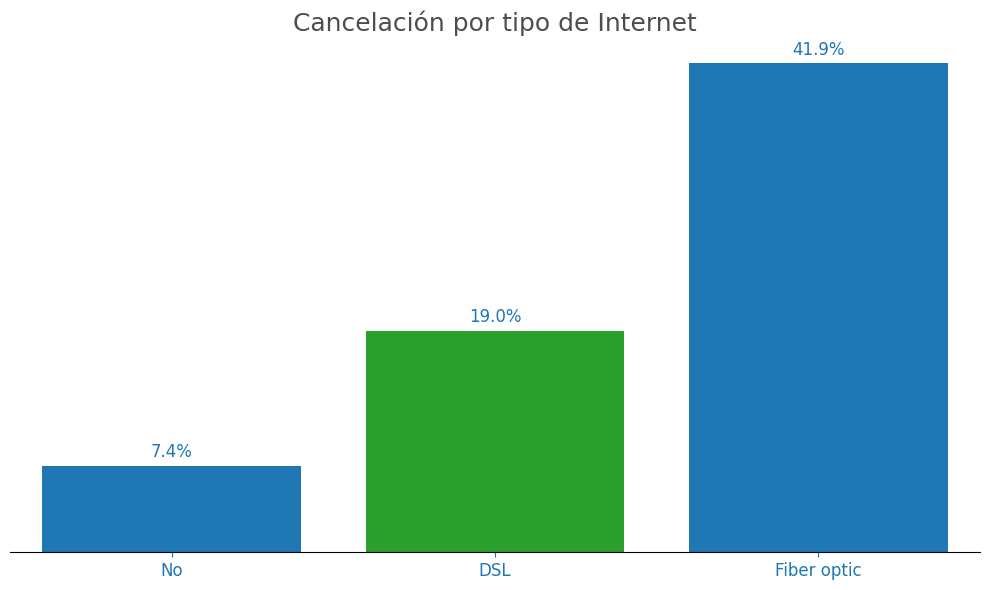

In [468]:
cancelacion_tipo_internet().show()

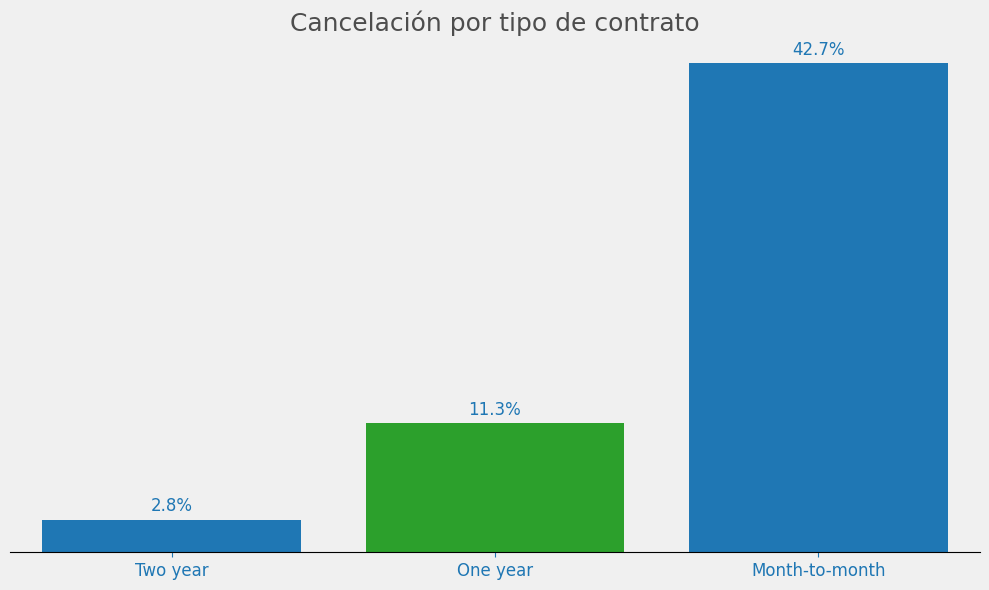

In [469]:
 cancelacion_tipo_contrato().show()

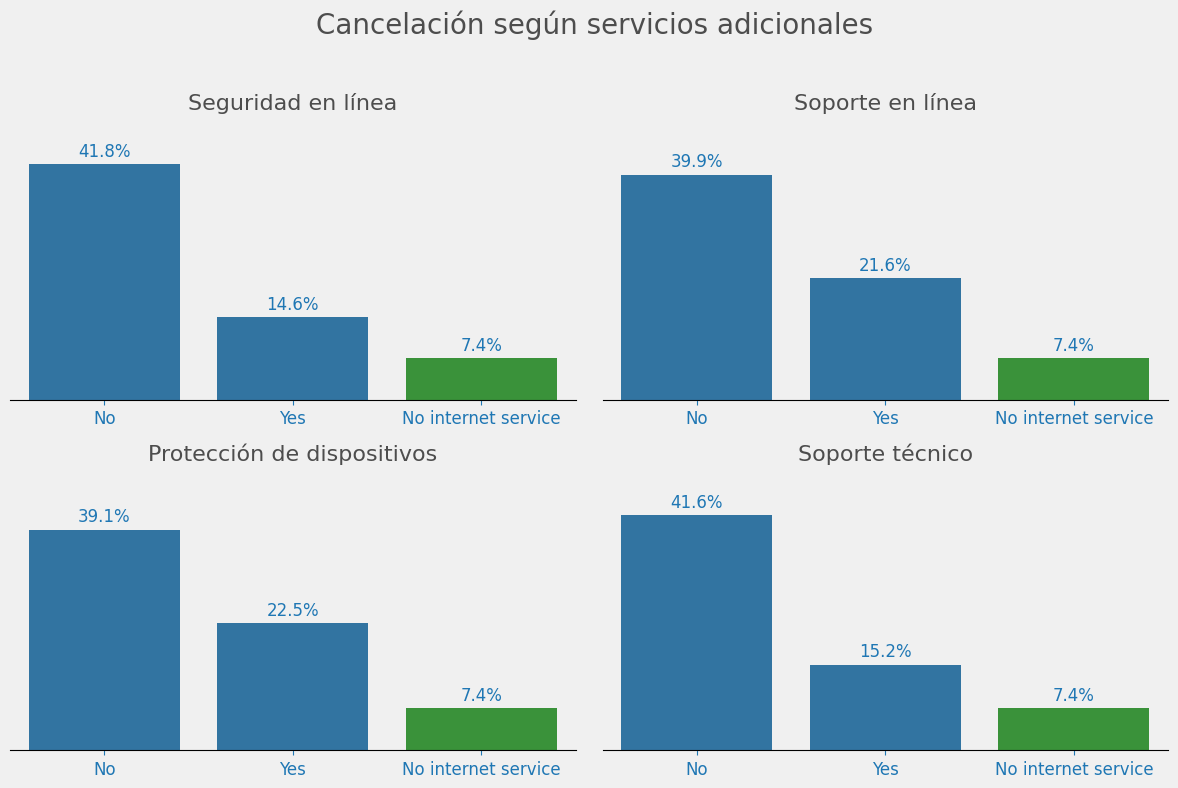

In [470]:
cancelacion_servicios_adicionales().show()

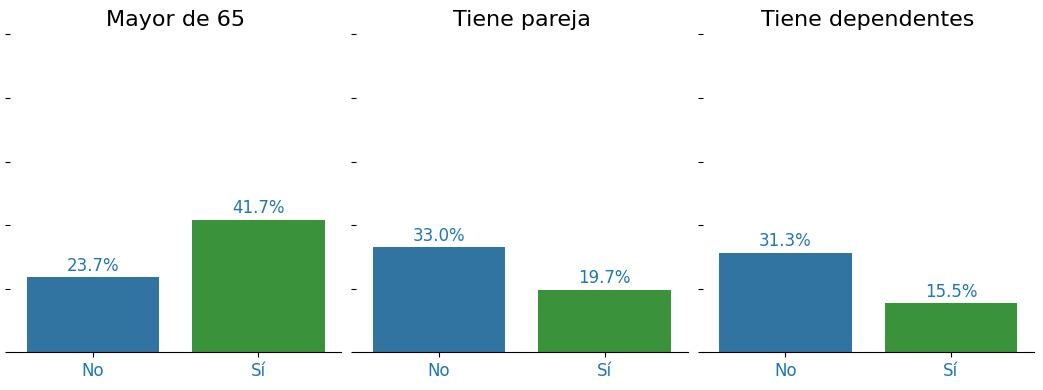

In [471]:
cancelacion_bin().show()

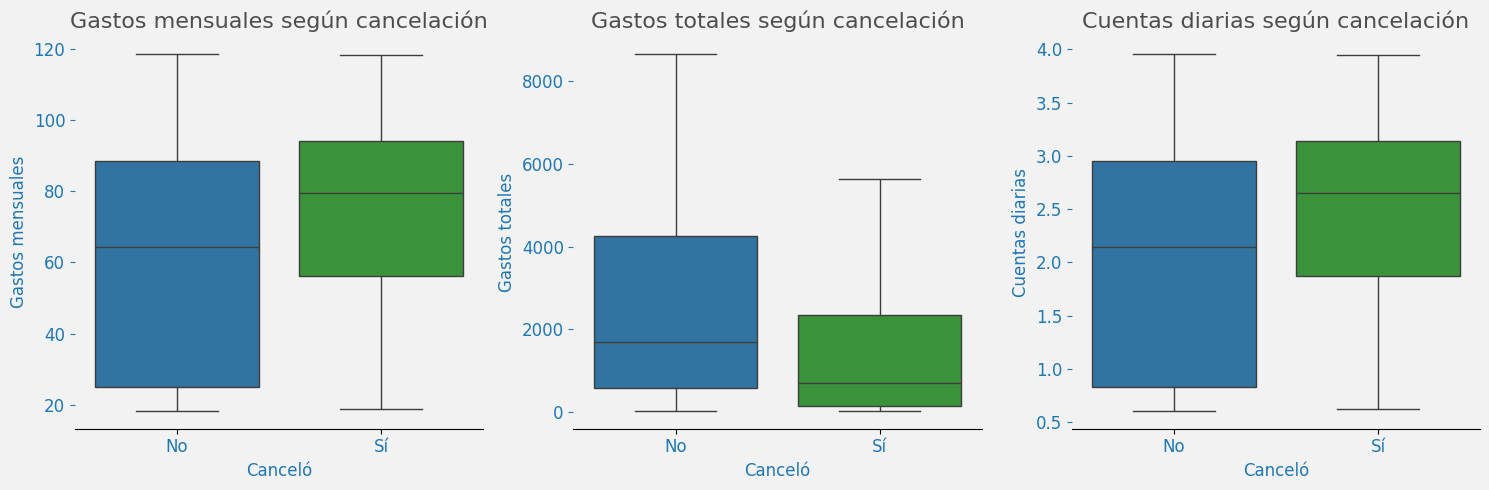

In [472]:
boxplot_cancelacion(columnas_numericas).show()

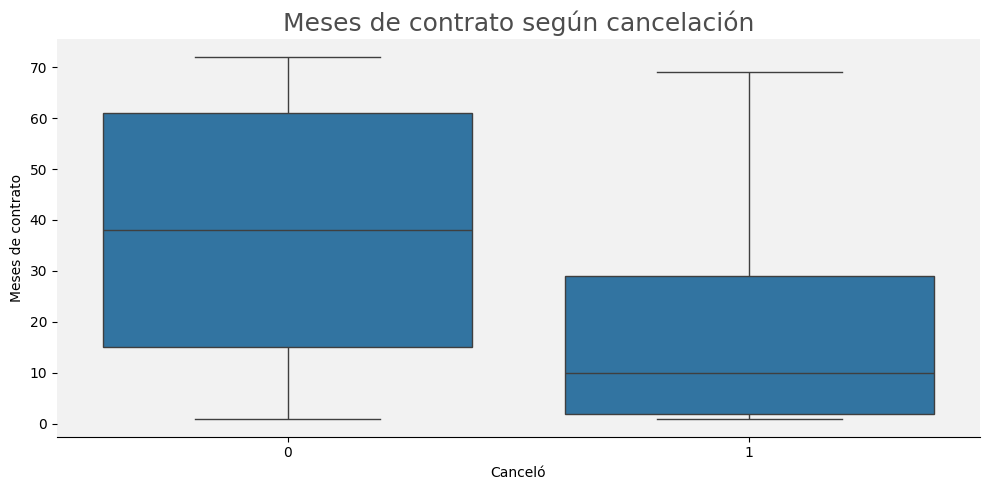

In [473]:
cancelacion_segun_meses().show()

🔹 Conclusiones e Insights:
🧪 Principales hallazgos

Mayor cancelación con fibra óptica: Los usuarios con internet de fibra óptica presentan un porcentaje de cancelación más alto (41.9%).

Contratos mes a mes tienen mayor evasión: Las personas con contratos mensuales tienen una tasa de cancelación elevada (42.7%), en comparación con otros tipos de contrato.

Menor fidelización sin servicios adicionales: Los clientes que no cuentan con servicios adicionales cancelan con mayor frecuencia:

Seguridad en línea: 41.8%

Soporte en línea: 39.9%

Protección de dispositivos: 39.1%

Soporte técnico: 41.6%

Edad avanzada y mayor tasa de cancelación: Los clientes mayores de 65 años tienen una tasa de cancelación mucho más alta (41.7%) que los más jóvenes.

Estado civil influye: Los clientes sin pareja cancelan más (~33%) que aquellos con pareja.

Menos dependientes, más cancelación: Los clientes sin personas a su cargo cancelan en mayor proporción (31.3%) que los que sí tienen dependientes.

Mayor gasto mensual, mayor probabilidad de cancelación: A medida que aumenta el gasto mensual, también lo hace la tasa de cancelación. Esto puede deberse a la percepción de que el servicio es costoso.

Clientes nuevos cancelan más: Quienes cancelaron tienen un total facturado significativamente menor, lo que indica que llevaban poco tiempo como clientes.

Más uso no garantiza fidelidad: Los clientes que cancelaron presentan ligeramente más conexiones diarias. Aunque la diferencia no es muy marcada, podría sugerir que usaban el servicio activamente pero no estaban satisfechos.

Contratos cortos = más cancelaciones: Los clientes que cancelaron tienden a tener contratos mucho más cortos (mediana ~10 meses), lo que sugiere menor compromiso o una etapa temprana de prueba del servicio.

🛠️ ¿Cómo reducir la evasión?

Revisar el servicio de fibra óptica: Identificar y corregir posibles fallas técnicas. Ofrecer alternativas tecnológicas (como otro tipo de conexión) en zonas problemáticas para evitar cancelaciones.

Incentivar contratos más duraderos: Ofrecer beneficios como descuentos o promociones para quienes eligen contratos más largos, sin imponer cláusulas de permanencia rígidas.

Incluir servicios adicionales sin recargo: Crear paquetes integrales que incluyan servicios como soporte técnico, seguridad en línea y protección de dispositivos, mejorando así la experiencia del cliente sin aumentar su factura.

Enfocarse en el público mayor: Diseñar ofertas específicas para adultos mayores, con contenidos o canales afines a sus intereses (por ejemplo, películas clásicas o programación religiosa).

Promociones para personas solas o sin dependientes: Brindar beneficios especiales como descuentos o servicios gratuitos adicionales a este grupo, que muestra mayor tendencia a cancelar.

Reducir la percepción de altos costos: Ajustar tarifas o implementar opciones de pago flexibles, como pagos quincenales, para mejorar la percepción de accesibilidad y evitar que los usuarios sientan que están pagando de más.

🔹 Recomendaciones:
Con base en los hallazgos obtenidos, se proponen las siguientes estrategias para reducir la tasa de cancelación y aumentar la fidelización de clientes:

Optimizar la experiencia de nuevos clientes:
Desarrollar un programa de bienvenida que acompañe a los nuevos usuarios durante los primeros meses.

Realizar encuestas de satisfacción temprana para detectar problemas a tiempo y evitar cancelaciones tempranas.

Mejorar la percepción de valor del servicio:
Reestructurar los paquetes para incluir servicios adicionales sin aumentar el precio final.

Comunicar de forma más clara los beneficios incluidos en el servicio (soporte, seguridad, protección).

Implementar opciones de pago más flexibles (ej. pagos quincenales o personalizados) para clientes con alto gasto mensual.

Fidelizar a los clientes con contratos mes a mes:
Ofrecer incentivos exclusivos para quienes migren de contrato mensual a uno de mayor duración (como beneficios permanentes o tarifas especiales).

Crear un sistema de recompensas o puntos por antigüedad, aplicable incluso en contratos mensuales.

Segmentar ofertas según el perfil del cliente:
Para adultos mayores: ofrecer contenido personalizado, soporte preferencial, atención al cliente dedicada y capacitación básica para el uso del servicio.

Para personas solteras o sin dependientes: crear campañas enfocadas en independencia, flexibilidad y autosuficiencia, con promociones diseñadas para su estilo de vida.

Auditar y mejorar el servicio de fibra óptica:
Analizar reclamos técnicos y evaluar la infraestructura por zonas geográficas.

Priorizar mejoras en las áreas con mayores tasas de cancelación asociadas a fibra óptica.

Capacitar al personal técnico para garantizar instalaciones sin inconvenientes.

Monitorear la actividad del usuario:
Identificar patrones de uso que preceden a la cancelación (como reducción en conexiones diarias).

Usar esta información para activar alertas preventivas o campañas personalizadas de retención.

Crear una unidad de análisis de cancelaciones:
Implementar un sistema continuo de análisis de evasión para identificar nuevas tendencias.

Hacer seguimiento mensual de métricas clave (edad, tipo de contrato, servicios adicionales, antigüedad, etc.).

In [474]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.lines import Line2D
import seaborn as sns
import requests
import json

In [475]:
df.rename(columns={
    'customerID': 'ID',
    'Churn':'cancelo',
    'gender': 'genero',
    'SeniorCitizen': 'mayor_de_65',
    'Partner': 'tiene_pareja',
    'Dependents': 'tiene_dependentes',
    'tenure': 'meses_de_contrato',
    'PhoneService': 'servicio_telefonico',
    'MultipleLines': 'lineas_multiples',
    'InternetService': 'servicio_internet',
    'OnlineSecurity': 'seguridad_en_linea',
    'OnlineBackup': 'Soporte_en_linea',
    'DeviceProtection': 'proteccion_dispositivos',
    'TechSupport': 'soporte_tecnico',
    'StreamingTV': 'servicio_tv',
    'StreamingMovies': 'servicio_peliculas',
    'PaperlessBilling': 'facturas_electronicas',
    'PaymentMethod': 'metodo_pago',
    'Contract': 'tipo_contrato',
    'Charges.Monthly': 'gastos_mensuales',
    'Charges.Total': 'gastos_totales'
}, inplace=True)

In [476]:
df['cancelo'] = df['cancelo'].replace('', np.nan)
df['gastos_totales'] = df['gastos_totales'].replace(' ', np.nan)

In [477]:
df = df.dropna(subset=['cancelo', 'gastos_totales'])

In [478]:
df['gastos_totales'] = df['gastos_totales'].astype(np.float64)

In [479]:
vars_a_str = ['ID', 'genero', 'servicio_internet', 'tipo_contrato', 'metodo_pago']

In [480]:
df[vars_a_str] = df[vars_a_str].astype(str)

In [481]:
columnas_bool = ['cancelo','mayor_de_65', 'tiene_pareja', 'tiene_dependentes', 'facturas_electronicas']
df[columnas_bool] = df[columnas_bool].replace({'Yes': True, 'No': False}).infer_objects(copy=False)

In [482]:
columnas_categoricas = ['lineas_multiples', 'seguridad_en_linea', 'Soporte_en_linea', 'proteccion_dispositivos', 'soporte_tecnico', 'servicio_tv', 'servicio_peliculas']
df[columnas_categoricas] = df[columnas_categoricas].astype('category')

In [483]:
df['cuentas_diarias'] = df['gastos_mensuales'].astype(float) / 30

In [484]:
df[columnas_bool] = df[columnas_bool].astype(int)

In [485]:
print(df.columns)

Index(['ID', 'cancelo', 'genero', 'mayor_de_65', 'tiene_pareja',
       'tiene_dependentes', 'meses_de_contrato', 'servicio_telefonico',
       'lineas_multiples', 'servicio_internet', 'seguridad_en_linea',
       'Soporte_en_linea', 'proteccion_dispositivos', 'soporte_tecnico',
       'servicio_tv', 'servicio_peliculas', 'tipo_contrato',
       'facturas_electronicas', 'metodo_pago', 'gastos_mensuales',
       'gastos_totales', 'cuentas_diarias'],
      dtype='object')


In [486]:
url = 'https://raw.githubusercontent.com/sandrazuniga/Challenge_TelecomX_Parte2/refs/heads/main/TelecomX_Data.json'

df = pd.read_json(url)

In [487]:
# Paso 1: Normalizar columnas anidadas
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Paso 2: Eliminar las columnas anidadas originales del DataFrame
df.drop(columns=['customer', 'phone', 'internet', 'account'], inplace=True)

# Paso 3: Concatenar el DataFrame original con los nuevos datos normalizados
df = pd.concat([df, customer_df, phone_df, internet_df, account_df], axis=1)

In [488]:
df.rename(columns={
    'customerID': 'ID',
    'Churn':'cancelo',
    'gender': 'genero',
    'SeniorCitizen': 'mayor_de_65',
    'Partner': 'tiene_pareja',
    'Dependents': 'tiene_dependentes',
    'tenure': 'meses_de_contrato',
    'PhoneService': 'servicio_telefonico',
    'MultipleLines': 'lineas_multiples',
    'InternetService': 'servicio_internet',
    'OnlineSecurity': 'seguridad_en_linea',
    'OnlineBackup': 'Soporte_en_linea',
    'DeviceProtection': 'proteccion_dispositivos',
    'TechSupport': 'soporte_tecnico',
    'StreamingTV': 'servicio_tv',
    'StreamingMovies': 'servicio_peliculas',
    'PaperlessBilling': 'facturas_electronicas',
    'PaymentMethod': 'metodo_pago',
    'Contract': 'tipo_contrato',
    'Charges.Monthly': 'gastos_mensuales',
    'Charges.Total': 'gastos_totales'
}, inplace=True)

In [489]:
df['cancelo'] = df['cancelo'].replace('', np.nan)
df['gastos_totales'] = df['gastos_totales'].replace(' ', np.nan)

In [490]:
df = df.dropna(subset=['cancelo', 'gastos_totales'])

In [491]:
df['gastos_totales'] = df['gastos_totales'].astype(np.float64)

In [492]:
vars_a_str = ['ID', 'genero', 'servicio_internet', 'tipo_contrato', 'metodo_pago']

In [493]:
df[vars_a_str] = df[vars_a_str].astype(str)

In [494]:
columnas_bool = ['cancelo','mayor_de_65', 'tiene_pareja', 'tiene_dependentes', 'facturas_electronicas']
df[columnas_bool] = df[columnas_bool].replace({'Yes': True, 'No': False}).infer_objects(copy=False)

/tmp/ipython-input-2192684715.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columnas_bool] = df[columnas_bool].replace({'Yes': True, 'No': False}).infer_objects(copy=False)


In [495]:
columnas_categoricas = ['lineas_multiples', 'seguridad_en_linea', 'Soporte_en_linea', 'proteccion_dispositivos', 'soporte_tecnico', 'servicio_tv', 'servicio_peliculas']
df[columnas_categoricas] = df[columnas_categoricas].astype('category')

In [496]:
df['cuentas_diarias'] = df['gastos_mensuales'].astype(float) / 30

In [497]:
df[columnas_bool] = df[columnas_bool].astype(int)

In [498]:
print(df.columns)

Index(['ID', 'cancelo', 'genero', 'mayor_de_65', 'tiene_pareja',
       'tiene_dependentes', 'meses_de_contrato', 'servicio_telefonico',
       'lineas_multiples', 'servicio_internet', 'seguridad_en_linea',
       'Soporte_en_linea', 'proteccion_dispositivos', 'soporte_tecnico',
       'servicio_tv', 'servicio_peliculas', 'tipo_contrato',
       'facturas_electronicas', 'metodo_pago', 'gastos_mensuales',
       'gastos_totales', 'cuentas_diarias'],
      dtype='object')


In [499]:
display(df)

,ID,cancelo,genero,mayor_de_65,tiene_pareja,tiene_dependentes,meses_de_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,proteccion_dispositivos,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,metodo_pago,gastos_mensuales,gastos_totales,cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,Yes,No,DSL,...,No,Yes,No,No,One year,0,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,1,Male,0,1,0,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,0,Male,0,0,0,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0,Male,0,1,1,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65,2.261667


In [500]:
display(df['cancelo'].value_counts())

,count
cancelo,
0,5163
1,1869


In [501]:
X = df.drop('cancelo', axis = 1)
y = df['cancelo']

In [502]:
X

,ID,genero,mayor_de_65,tiene_pareja,tiene_dependentes,meses_de_contrato,servicio_telefonico,lineas_multiples,servicio_internet,seguridad_en_linea,...,proteccion_dispositivos,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,metodo_pago,gastos_mensuales,gastos_totales,cuentas_diarias
0,0002-ORFBO,Female,0,1,1,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,Male,0,0,0,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Male,0,0,0,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Male,1,1,0,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Female,1,1,0,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,Female,0,0,0,13,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,0,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Male,0,1,0,22,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,Male,0,0,0,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,Male,0,1,1,67,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65,2.261667


In [503]:
y

,cancelo
0,0
1,0
2,1
3,1
4,1
...,...
7262,0
7263,1
7264,0
7265,0


In [504]:
display(X_train_df.columns.values)

array(['onehotencoder__ID_0002-ORFBO', 'onehotencoder__ID_0003-MKNFE',
       'onehotencoder__ID_0004-TLHLJ', ..., 'remainder__tiene_pareja',
       'remainder__tiene_dependentes', 'remainder__facturas_electronicas'],
      dtype=object)

In [505]:
display(X_train_corr)

,onehotencoder__ID_0002-ORFBO,onehotencoder__ID_0003-MKNFE,onehotencoder__ID_0004-TLHLJ,onehotencoder__ID_0011-IGKFF,onehotencoder__ID_0013-EXCHZ,onehotencoder__ID_0013-MHZWF,onehotencoder__ID_0013-SMEOE,onehotencoder__ID_0015-UOCOJ,onehotencoder__ID_0016-QLJIS,onehotencoder__ID_0017-DINOC,...,onehotencoder__metodo_pago_Mailed check,standardscaler__meses_de_contrato,standardscaler__gastos_mensuales,standardscaler__gastos_totales,standardscaler__cuentas_diarias,remainder__mayor_de_65,remainder__tiene_pareja,remainder__tiene_dependentes,remainder__facturas_electronicas,cancelo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,-0.541067,0.837322,-0.260064,0.837322,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.233499,0.177040,-0.940706,0.177040,1.0,1.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.517947,1.293033,1.094128,1.293033,0.0,0.0,0.0,1.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.536229,-1.496118,-0.385855,-1.496118,0.0,1.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,-1.029843,-1.017123,-0.889925,-1.017123,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.495498,0.556244,1.449921,0.556244,0.0,0.0,0.0,1.0,0
6324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,-0.378142,-1.501108,-0.810276,-1.501108,0.0,1.0,1.0,0.0,0
6325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.459605,0.308431,-0.311618,0.308431,0.0,1.0,1.0,1.0,1
6326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.029843,-0.481579,-0.846412,-0.481579,0.0,1.0,0.0,1.0,0


In [510]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Remove 'ID' from categorical columns as it's not needed for modeling
categorical_cols = categorical_cols.drop('ID')

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('scaler', StandardScaler(), numerical_cols)
    ],
    remainder='passthrough' # Keep other columns (like 'ID')
)

# Apply the transformations to X_train
X_train_encoded = preprocessor.fit_transform(X_train)

# Create a DataFrame from the transformed data
# Get feature names from the preprocessor
onehot_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_cols)
scaler_feature_names = numerical_cols.tolist()
passthrough_feature_names = preprocessor.transformers_[2][2] # Get names from remainder

all_feature_names = list(onehot_feature_names) + scaler_feature_names + list(passthrough_feature_names)


X_train_df = pd.DataFrame(X_train_encoded, columns=all_feature_names)
X_train_df

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


,genero_Female,genero_Male,servicio_telefonico_No,servicio_telefonico_Yes,lineas_multiples_No,lineas_multiples_No phone service,lineas_multiples_Yes,servicio_internet_DSL,servicio_internet_Fiber optic,servicio_internet_No,...,metodo_pago_Mailed check,mayor_de_65,tiene_pareja,tiene_dependentes,meses_de_contrato,facturas_electronicas,gastos_mensuales,gastos_totales,cuentas_diarias,0
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,-0.438364,-0.964291,-0.654555,-0.541067,-1.212811,0.837322,-0.260064,0.837322,2139-FQHLM
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,2.281211,1.037032,-0.654555,-1.233499,-1.212811,0.17704,-0.940706,0.17704,5119-NZPTV
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,-0.438364,-0.964291,-0.654555,0.517947,0.824531,1.293033,1.094128,1.293033,3932-IJWDZ
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,-0.438364,1.037032,-0.654555,1.536229,-1.212811,-1.496118,-0.385855,-1.496118,0505-SPOOW
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,-0.438364,1.037032,-0.654555,-1.029843,-1.212811,-1.017123,-0.889925,-1.017123,1976-AZZPJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6323,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,-0.438364,-0.964291,-0.654555,1.495498,0.824531,0.556244,1.449921,0.556244,5930-GBIWP
6324,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,-0.438364,1.037032,1.527755,-0.378142,-1.212811,-1.501108,-0.810276,-1.501108,6082-OQFBA
6325,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,-0.438364,1.037032,1.527755,-0.459605,0.824531,0.308431,-0.311618,0.308431,1396-QWFBJ
6326,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,-0.438364,1.037032,-0.654555,-1.029843,0.824531,-0.481579,-0.846412,-0.481579,1848-LBZHY


In [512]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6328 entries, 0 to 6327
Data columns (total 44 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   genero_Female                                6328 non-null   object
 1   genero_Male                                  6328 non-null   object
 2   servicio_telefonico_No                       6328 non-null   object
 3   servicio_telefonico_Yes                      6328 non-null   object
 4   lineas_multiples_No                          6328 non-null   object
 5   lineas_multiples_No phone service            6328 non-null   object
 6   lineas_multiples_Yes                         6328 non-null   object
 7   servicio_internet_DSL                        6328 non-null   object
 8   servicio_internet_Fiber optic                6328 non-null   object
 9   servicio_internet_No                         6328 non-null   object
 10  seguridad_en

In [513]:
# Apply the transformations to X_test
X_test_encoded = preprocessor.transform(X_test)

# Create a DataFrame from the transformed data
# Get feature names from the preprocessor
onehot_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_cols)
scaler_feature_names = numerical_cols.tolist()
passthrough_feature_names = preprocessor.transformers_[2][2] # Get names from remainder

all_feature_names = list(onehot_feature_names) + scaler_feature_names + list(passthrough_feature_names)


X_test_df = pd.DataFrame(X_test_encoded, columns=all_feature_names)
display(X_test_df)

,genero_Female,genero_Male,servicio_telefonico_No,servicio_telefonico_Yes,lineas_multiples_No,lineas_multiples_No phone service,lineas_multiples_Yes,servicio_internet_DSL,servicio_internet_Fiber optic,servicio_internet_No,...,metodo_pago_Mailed check,mayor_de_65,tiene_pareja,tiene_dependentes,meses_de_contrato,facturas_electronicas,gastos_mensuales,gastos_totales,cuentas_diarias,0
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,-0.438364,1.037032,1.527755,1.25111,-1.212811,0.363316,1.062697,0.363316,3902-MIVLE
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,-0.438364,1.037032,1.527755,1.047454,-1.212811,-1.472834,-0.476968,-1.472834,2346-LOCWC
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,-0.438364,1.037032,-0.654555,-0.296679,0.824531,1.010292,0.055043,1.010292,3003-CMDUU
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,-0.438364,-0.964291,-0.654555,-0.337411,0.824531,0.85728,0.005058,0.85728,7979-CORPM
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,-0.438364,-0.964291,-0.654555,0.31429,0.824531,-0.340209,-0.015418,-0.340209,9411-TPQQV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,-0.438364,1.037032,1.527755,0.843797,0.824531,1.346254,1.460104,1.346254,3567-PQTSO
700,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,-0.438364,-0.964291,-0.654555,-1.274231,0.824531,-0.46661,-0.980861,-0.46661,7794-JASDG
701,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,2.281211,-0.964291,-0.654555,-1.152037,-1.212811,-0.533138,-0.92383,-0.533138,2277-VWCNI
702,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,2.281211,1.037032,1.527755,1.373304,0.824531,1.524214,2.182182,1.524214,4827-LTQRJ


In [515]:
X_train_corr = X_train_df.copy()
# Drop the non-numeric 'ID' column before calculating correlation
X_train_corr = X_train_corr.drop(0, axis=1)
X_train_corr['cancelo'] = y_train.reset_index(drop=True)

correlaciones = X_train_corr.corr()['cancelo'].sort_values(ascending=False)
print(correlaciones)

cancelo                                        1.000000
tipo_contrato_Month-to-month                   0.407733
seguridad_en_linea_No                          0.342980
soporte_tecnico_No                             0.339736
servicio_internet_Fiber optic                  0.313586
metodo_pago_Electronic check                   0.307604
Soporte_en_linea_No                            0.266649
proteccion_dispositivos_No                     0.252638
cuentas_diarias                                0.197618
gastos_mensuales                               0.197618
facturas_electronicas                          0.195845
mayor_de_65                                    0.155541
servicio_peliculas_No                          0.132361
servicio_tv_No                                 0.121928
servicio_tv_Yes                                0.070682
servicio_peliculas_Yes                         0.060338
lineas_multiples_Yes                           0.046134
servicio_telefonico_Yes                        0

In [521]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

# Initialize the Logistic Regression model with L1 regularization
modelo_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

# Initialize RFECV with the Logistic Regression model
selector = RFECV(estimator=modelo_l1, step=1, cv=5, scoring='accuracy')

# Fit RFECV to the training data
# Ensure X_train_df does not contain the 'ID' column before fitting
if '0' in X_train_df.columns:
    X_train_df_no_id = X_train_df.drop('0', axis=1)
else:
    X_train_df_no_id = X_train_df.copy()

selector.fit(X_train_df_no_id, y_train)

# Get the selected features
selected_features = X_train_df_no_id.columns[selector.support_]

# Print the optimal number of features and the selected features
print("Número óptimo de variables:", selector.n_features_)
print("\nVariables seleccionadas:")
print(selected_features)

Número óptimo de variables: 23

Variables seleccionadas:
Index(['genero_Male', 'servicio_telefonico_Yes', 'lineas_multiples_No',
       'servicio_internet_DSL', 'servicio_internet_No',
       'seguridad_en_linea_Yes', 'Soporte_en_linea_Yes',
       'proteccion_dispositivos_Yes', 'soporte_tecnico_Yes', 'servicio_tv_No',
       'servicio_tv_No internet service', 'servicio_peliculas_No',
       'tipo_contrato_Month-to-month', 'tipo_contrato_One year',
       'tipo_contrato_Two year', 'metodo_pago_Credit card (automatic)',
       'metodo_pago_Electronic check', 'metodo_pago_Mailed check',
       'mayor_de_65', 'tiene_dependentes', 'meses_de_contrato',
       'facturas_electronicas', 'gastos_totales'],
      dtype='object')


In [524]:
print(X_train_df.columns)
print(X_test_df.columns)

Index(['genero_Female', 'genero_Male', 'servicio_telefonico_No',
       'servicio_telefonico_Yes', 'lineas_multiples_No',
       'lineas_multiples_No phone service', 'lineas_multiples_Yes',
       'servicio_internet_DSL', 'servicio_internet_Fiber optic',
       'servicio_internet_No', 'seguridad_en_linea_No',
       'seguridad_en_linea_No internet service', 'seguridad_en_linea_Yes',
       'Soporte_en_linea_No', 'Soporte_en_linea_No internet service',
       'Soporte_en_linea_Yes', 'proteccion_dispositivos_No',
       'proteccion_dispositivos_No internet service',
       'proteccion_dispositivos_Yes', 'soporte_tecnico_No',
       'soporte_tecnico_No internet service', 'soporte_tecnico_Yes',
       'servicio_tv_No', 'servicio_tv_No internet service', 'servicio_tv_Yes',
       'servicio_peliculas_No', 'servicio_peliculas_No internet service',
       'servicio_peliculas_Yes', 'tipo_contrato_Month-to-month',
       'tipo_contrato_One year', 'tipo_contrato_Two year',
       'metodo_pago_Ban

In [527]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(random_state=42)

# Resample the training data
X_train_bal, y_train_bal = ros.fit_resample(X_train_df_no_id, y_train)

# Display the class distribution after resampling
print("Class distribution after resampling:")
display(y_train_bal.value_counts())

print("Distribución original:", Counter(y))
print("Distribución del entrenamiento antes del balanceo:", Counter(y_train))
print("Distribución del entrenamiento balanceado:", Counter(y_train_bal))

counter = Counter(y_train_bal)
if len(set(counter.values())) == 1:
    print("Las clases están perfectamente balanceadas.")
else:
    print("Las clases NO están balanceadas perfectamente.")

Class distribution after resampling:


,count
cancelo,
0,4646
1,4646


Distribución original: Counter({0: 5163, 1: 1869})
Distribución del entrenamiento antes del balanceo: Counter({0: 4646, 1: 1682})
Distribución del entrenamiento balanceado: Counter({0: 4646, 1: 4646})
Las clases están perfectamente balanceadas.


In [528]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

def evaluar_modelo(y_test, y_pred):
  print("Resultados para el modelo:")
  print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
  print(f"Precision: {precision_score(y_test, y_pred):.2f}")
  print(f"Recall: {recall_score(y_test, y_pred):.2f}")
  print(f"F1: {f1_score(y_test, y_pred):.2f}")

In [532]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model with the selected features and balanced data
modelo_logistico = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
modelo_logistico.fit(X_train_bal[selected_features], y_train_bal)

# Predict on the test set using the selected features
X_test_df_no_id = X_test_df.drop(0, axis=1)
y_pred = modelo_logistico.predict(X_test_df_no_id[selected_features])

# Evaluate the model
evaluar_modelo(y_test, y_pred)

Resultados para el modelo:
Accuracy: 0.74
Precision: 0.50
Recall: 0.72
F1: 0.59


In [533]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=100,
    min_samples_split=5,
    min_samples_leaf=10,
    max_features='log2',
    class_weight='balanced',
    random_state=42
)

# Train the RandomForestClassifier model with the selected features and balanced data
modelo_rf.fit(X_train_bal[selected_features], y_train_bal)

# Predict on the test set using the selected features
y_modelo_rf = modelo_rf.predict(X_test_df_no_id[selected_features])

# Evaluate the model
evaluar_modelo(y_test, y_modelo_rf)

Resultados para el modelo:
Accuracy: 0.74
Precision: 0.51
Recall: 0.70
F1: 0.59


In [534]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the Gradient Boosting Classifier model with balanced data
modelo_gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    random_state=42
)

modelo_gb.fit(X_train_bal[selected_features], y_train_bal)

# Predict on the test set using the selected features
y_modelo_gb = modelo_gb.predict(X_test_df_no_id[selected_features])

# Evaluate the model
evaluar_modelo(y_test, y_modelo_gb)

Resultados para el modelo:
Accuracy: 0.74
Precision: 0.51
Recall: 0.73
F1: 0.60


In [535]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import numpy as np

# Initialize the models (already initialized in previous cells)
# modelo_rf = RandomForestClassifier(
#     n_estimators=50,
#     max_depth=100,
#     min_samples_split=5,
#     min_samples_leaf=10,
#     max_features='log2',
#     class_weight='balanced',
#     random_state=42
# )

# modelo_gb = GradientBoostingClassifier(
#     n_estimators=100,
#     learning_rate=0.1,
#     max_depth=3,
#     subsample=0.8,
#     random_state=42
# )

# Initialize the Voting Classifier
modelo_voto = VotingClassifier(estimators=[('rf', modelo_rf), ('gb', modelo_gb)], voting='soft')

# Train the Voting Classifier model with the selected features and balanced data
modelo_voto.fit(X_train_bal[selected_features], y_train_bal)

# Predict probabilities on the test set using the selected features
y_proba = modelo_voto.predict_proba(X_test_df_no_id[selected_features])[:, 1]

# Define the threshold and predict
umbral = 0.45
y_pred = (y_proba >= umbral).astype(int)

# Evaluate the model
evaluar_modelo(y_test, y_pred)

Resultados para el modelo:
Accuracy: 0.74
Precision: 0.51
Recall: 0.77
F1: 0.61


Resultados para el modelo:
Accuracy: 0.74
Precision: 0.51
Recall: 0.77
F1: 0.61


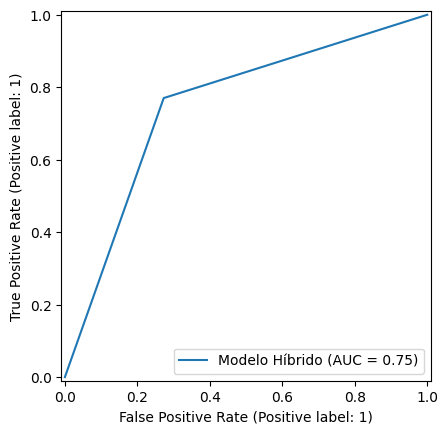

In [536]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import numpy as np
from sklearn.metrics import RocCurveDisplay


# Initialize the models (already initialized in previous cells)
# modelo_rf = RandomForestClassifier(
#     n_estimators=50,
#     max_depth=100,
#     min_samples_split=5,
#     min_samples_leaf=10,
#     max_features='log2',
#     class_weight='balanced',
#     random_state=42
# )

# modelo_gb = GradientBoostingClassifier(
#     n_estimators=100,
#     learning_rate=0.1,
#     max_depth=3,
#     subsample=0.8,
#     random_state=42
# )

# Initialize the Voting Classifier
modelo_voto = VotingClassifier(estimators=[('rf', modelo_rf), ('gb', modelo_gb)], voting='soft')

# Train the Voting Classifier model with the selected features and balanced data
modelo_voto.fit(X_train_bal[selected_features], y_train_bal)

# Predict probabilities on the test set using the selected features
y_proba = modelo_voto.predict_proba(X_test_df_no_id[selected_features])[:, 1]

# Define the threshold and predict
umbral = 0.45
y_pred = (y_proba >= umbral).astype(int)

# Evaluate the model
evaluar_modelo(y_test, y_pred)

# Plot ROC curve
RocCurveDisplay.from_predictions(y_test, y_pred, name = 'Modelo Híbrido');

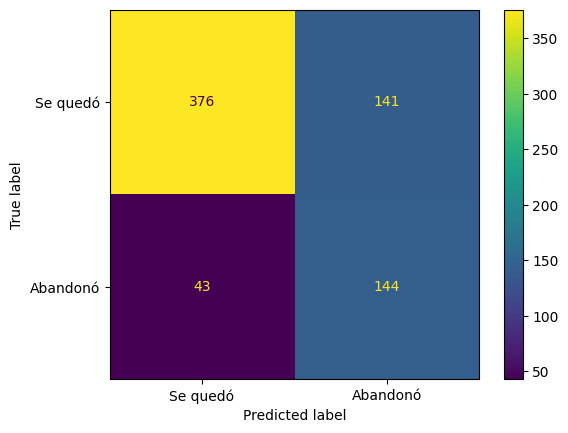

In [537]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

matriz_confusion = confusion_matrix(y_test, y_pred)
visualizacion_matriz = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels = ['Se quedó', 'Abandonó'])
visualizacion_matriz.plot();

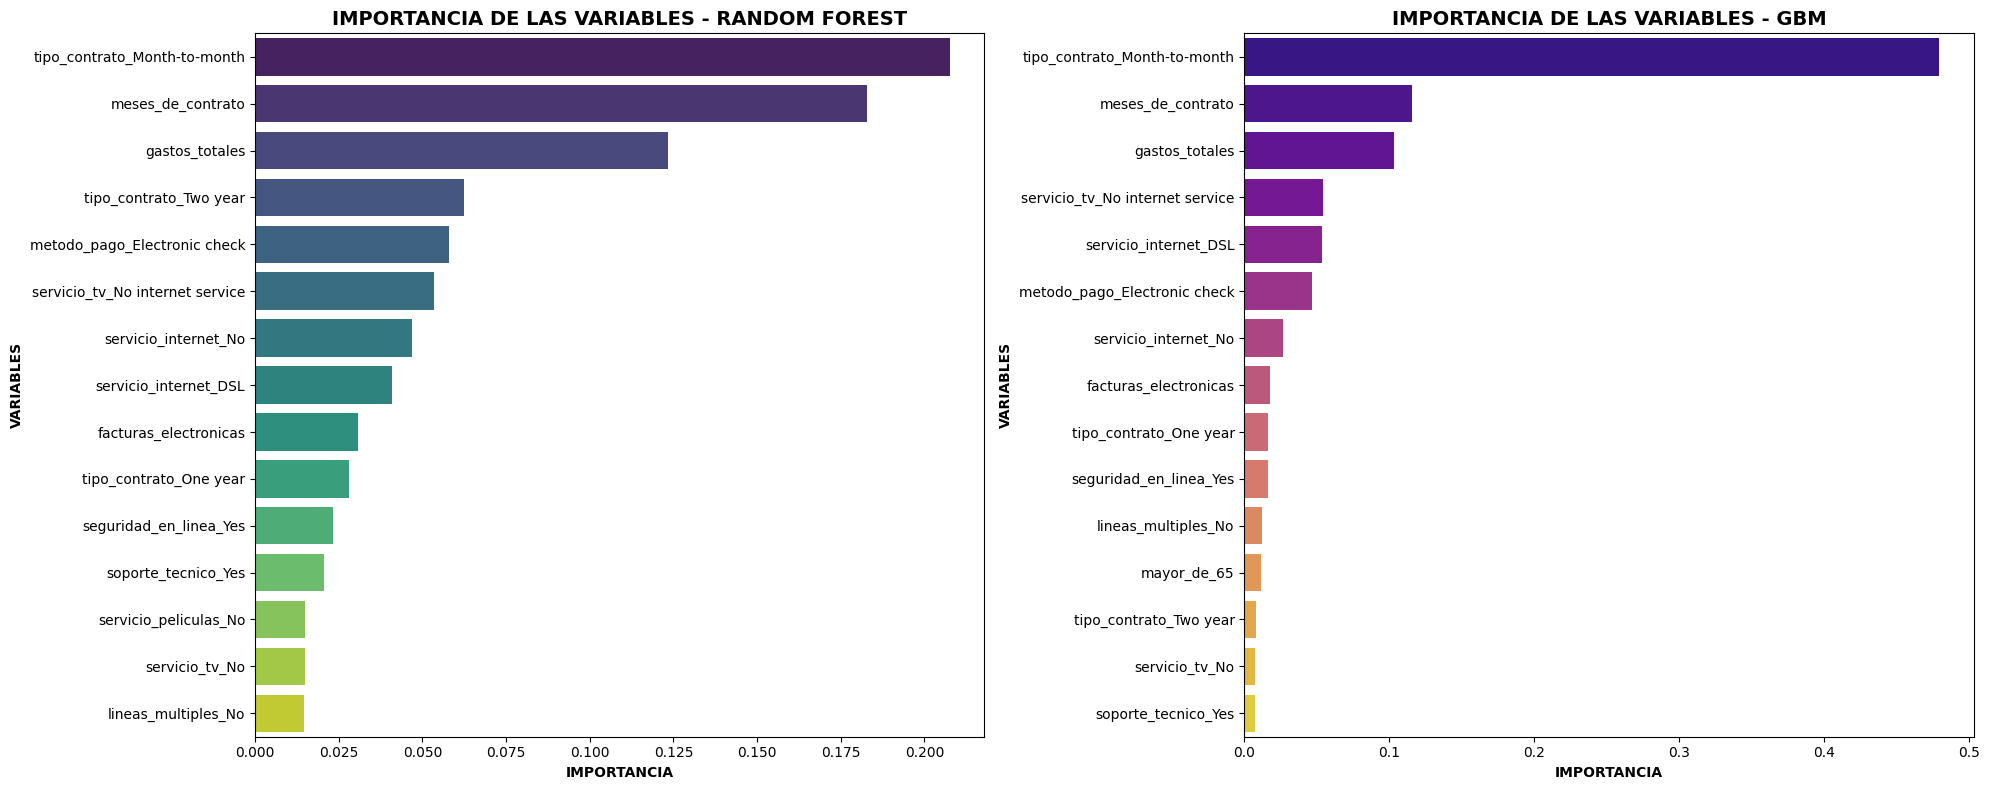

In [538]:
# Get feature importances from the trained models
rf_importance = modelo_rf.feature_importances_
gb_importance = modelo_gb.feature_importances_

# Get the names of the selected features
feature_names = selected_features

# Create a DataFrame to hold feature importances
importance_df = pd.DataFrame({
    'Variable': feature_names,
    'RandomForest': rf_importance,
    'GBM': gb_importance
})

# Create subplots for side-by-side visualization
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot for Random Forest feature importance
rf_plot_data = importance_df.sort_values('RandomForest', ascending=False).head(15)
sns.barplot(x='RandomForest', y='Variable', data=rf_plot_data, ax=axes[0], palette='viridis', hue='Variable', legend=False)
axes[0].set_title('IMPORTANCIA DE LAS VARIABLES - RANDOM FOREST', fontsize=14, fontweight='bold')
axes[0].set_xlabel('IMPORTANCIA', fontsize=10, fontweight='bold')
axes[0].set_ylabel('VARIABLES', fontsize=10, fontweight='bold')

# Plot for Gradient Boosting Machine (GBM) feature importance
gbm_plot_data = importance_df.sort_values('GBM', ascending=False).head(15)
sns.barplot(x='GBM', y='Variable', data=gbm_plot_data, ax=axes[1], palette='plasma', hue='Variable', legend=False)
axes[1].set_title('IMPORTANCIA DE LAS VARIABLES - GBM', fontsize=14, fontweight='bold')
axes[1].set_xlabel('IMPORTANCIA', fontsize=10, fontweight='bold')
axes[1].set_ylabel('VARIABLES', fontsize=10, fontweight='bold')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

In [542]:
comparison_table = importance_df.sort_values(by='RandomForest', ascending=False).reset_index(drop=True).head(15)
print("TABLA COMPARATIVA DE LA IMPORTANCIA DE LAS VARIABLES")
print("-" * 50)
print(comparison_table)

TABLA COMPARATIVA DE LA IMPORTANCIA DE LAS VARIABLES
--------------------------------------------------
                           Variable  RandomForest       GBM
0      tipo_contrato_Month-to-month      0.207507  0.479335
1                 meses_de_contrato      0.182926  0.115624
2                    gastos_totales      0.123405  0.103305
3            tipo_contrato_Two year      0.062472  0.008017
4      metodo_pago_Electronic check      0.057996  0.046515
5   servicio_tv_No internet service      0.053338  0.054180
6              servicio_internet_No      0.046790  0.027000
7             servicio_internet_DSL      0.041029  0.053607
8             facturas_electronicas      0.030680  0.017416
9            tipo_contrato_One year      0.028206  0.016253
10           seguridad_en_linea_Yes      0.023281  0.016203
11              soporte_tecnico_Yes      0.020725  0.007264
12            servicio_peliculas_No      0.014861  0.005809
13                   servicio_tv_No      0.014839  0.007

In [545]:
print(X_train_bal[selected_features].columns)

Index(['genero_Male', 'servicio_telefonico_Yes', 'lineas_multiples_No',
       'servicio_internet_DSL', 'servicio_internet_No',
       'seguridad_en_linea_Yes', 'Soporte_en_linea_Yes',
       'proteccion_dispositivos_Yes', 'soporte_tecnico_Yes', 'servicio_tv_No',
       'servicio_tv_No internet service', 'servicio_peliculas_No',
       'tipo_contrato_Month-to-month', 'tipo_contrato_One year',
       'tipo_contrato_Two year', 'metodo_pago_Credit card (automatic)',
       'metodo_pago_Electronic check', 'metodo_pago_Mailed check',
       'mayor_de_65', 'tiene_dependentes', 'meses_de_contrato',
       'facturas_electronicas', 'gastos_totales'],
      dtype='object')


In [548]:
print(selected_features)

Index(['genero_Male', 'servicio_telefonico_Yes', 'lineas_multiples_No',
       'servicio_internet_DSL', 'servicio_internet_No',
       'seguridad_en_linea_Yes', 'Soporte_en_linea_Yes',
       'proteccion_dispositivos_Yes', 'soporte_tecnico_Yes', 'servicio_tv_No',
       'servicio_tv_No internet service', 'servicio_peliculas_No',
       'tipo_contrato_Month-to-month', 'tipo_contrato_One year',
       'tipo_contrato_Two year', 'metodo_pago_Credit card (automatic)',
       'metodo_pago_Electronic check', 'metodo_pago_Mailed check',
       'mayor_de_65', 'tiene_dependentes', 'meses_de_contrato',
       'facturas_electronicas', 'gastos_totales'],
      dtype='object')


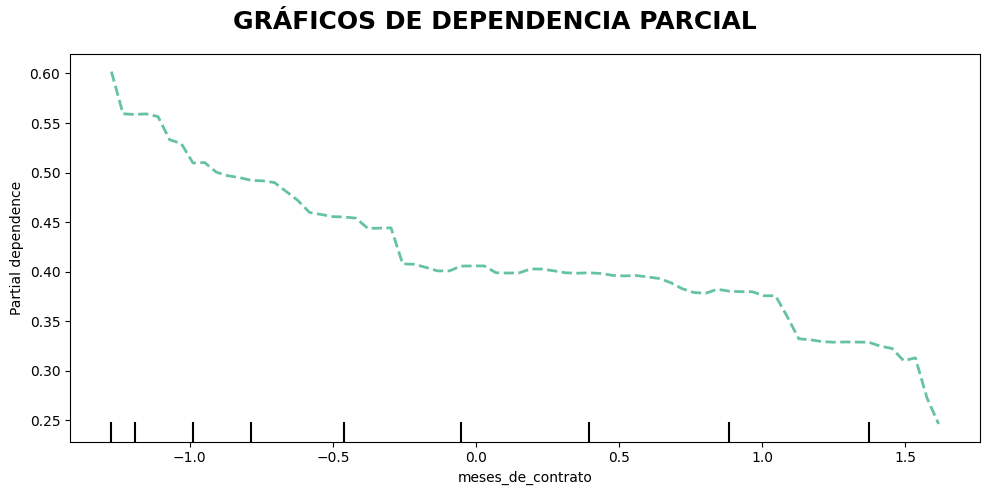

In [554]:
from sklearn.inspection import PartialDependenceDisplay

# Adapt features_to_plot to use the names from selected_features
features_to_plot = [
    'meses_de_contrato',
    'gastos_mensuales' # This column name might need to be adjusted based on the selected_features
]

# Check if 'gastos_mensuales' is in selected_features and adjust if necessary
if 'gastos_mensuales' not in selected_features:
  # Assuming it might be scaled, check for scaled version
  scaled_gastos_mensuales = 'standardscaler__gastos_mensuales'
  if scaled_gastos_mensuales in selected_features:
    features_to_plot[features_to_plot.index('gastos_mensuales')] = scaled_gastos_mensuales
  else:
    print("Warning: 'gastos_mensuales' or its scaled version not found in selected features.")
    # Remove 'gastos_mensuales' if not found to avoid error
    features_to_plot.remove('gastos_mensuales')


fig, axs = plt.subplots(1, len(features_to_plot), figsize=(10 * len(features_to_plot), 5), squeeze=False) # Adjust subplot layout
palette = sns.color_palette("Set2", len(features_to_plot))
line_kw_list = [{"color": c, "linewidth": 2, "linestyle": "--"} for c in palette]
fig.suptitle('GRÁFICOS DE DEPENDENCIA PARCIAL', fontsize=18, fontweight='bold')

# Ensure the number of features to plot matches the number of subplots
if len(features_to_plot) > len(axs.ravel()):
    print(f"Warning: More features to plot ({len(features_to_plot)}) than available subplots ({len(axs.ravel())}). Adjusting features to plot.")
    features_to_plot = features_to_plot[:len(axs.ravel())]


for i, feature in enumerate(features_to_plot):
    ax = axs.ravel()[i]

    PartialDependenceDisplay.from_estimator(
        modelo_voto, # Use the trained Voting Classifier model
        X_train_bal[selected_features], # Use the balanced training data with selected features
        [feature],
        ax=ax,
        kind='average',
        grid_resolution=100,
        line_kw=line_kw_list[i]
    )

    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

🔹 Introducción:

Este informe enmarca la 2da parte del proyecto de Telecom X, una empresa que enfrenta una alarmante tasa de cancelaciones de su clientela. El objetivo principal fue diseñar modelos predictivos, realizar un análisis de los factores que más influyen en la cancelación y emprender acciones para mejorar la retención de clientes.

El proyecto se desarrolló a partir del DataFrame ya procesado en la primera parte, incluyendo la separación de datos, codificación, balanceo de clases, y la posterior creación y evaluación de los modelos.

🔹 Objetivos:

Debido a que la adquisición de nuevos clientes es significativamente más costosa que la retención de los existentes, se ha llevado a cabo un análisis de para construir modelos predictivos que permitan:

Identificar y cuantificar los principales factores que conducen a la cancelación.
Minimizar la pérdida de clientes.
Entender el comportamiento diferencial de los modelos predictivos.
Proponer un conjunto de estrategias de retención para mitigar los riesgos identificados.
🔹 Metodología:

Se entrenaron 3 modelos de clasificación reconocidos por su alto rendimiento, los cuales son Logistic Regression (LR), Random Forest (RF), Gradient Boosting Machine (GBM). Debido al primer modelo que se usó, fue necesario normalizar los datos en el encoding mediante el StandardScaler(). A continuación, se detalla su impacto en los 3 modelos:

La Regresión Logística calcula una función lineal de los predictores para estimar probabilidades. Si las variables tienen escalas muy distintas, aquellas con escalas mayores tienden a dominar la magnitud de los coeficientes, afectando negativamente la convergencia del algoritmo de optimización. Los beneficios de normalizar son: una mejora en la estabilidad numérica, una aceleración en el proceso de entrenamiento y permite una comparación más justa entre coeficientes (aunque no directamente interpretable como importancia).

El Random Forest y Gradiente Boosting Machine no requieren normalización ya que construyen árboles de decisión que dividen los datos según umbrales en variables individuales. Este proceso no depende de las distancias ni de la magnitud relativa de las variables, sino de su capacidad para dividir los datos de manera informativa.

De estos 3 modelos, el Gradient Boostin Machine presentó las mejores métricas individualmente, no obstante, para obtener un leve aumento en las estadísticas, se decidió usar un modelo de ensamble mediante VotingClassifier(). Con este método se emplearon los modelos Random Forest (bagging) y Gradient Boosting Machine (boosting). Esta combinación permite capturar distintas formas de aprender patrones en los datos, potenciando la capacidad de generalización del modelo final.

🔹 Análisis de los factores clave de cancelación:

El análisis de los gráficos reveló patrones claros que los modelos aprendieron para predecir el churn. La conclusión principal es que los factores contractuales son, por amplio margen, los predictores más potentes y fiables. Otros factores, como el método de pago y el tipo de servicio, aportan información secundaria pero comercialmente relevante.

La evidencia más contundente se encuentra en las variables relacionadas con la duración del contrato. El gráfico de meses contratados muestra una relación inversa y casi lineal: A mayor duración, menor probabilidad de cancelación. Esta tendencia se refuerza con los gráficos categóricos, donde tener un contrato "Mes a Mes" incrementa significativamente el riesgo de churn, mientras que los contratos de "Dos Años" lo reducen. Así, los tres gráficos narran una historia coherente: La estabilidad contractual es el pilarde la retención de clientes según los modelos.

Más allá de los contratos, emergen dos factores relevantes. Primero, el uso del cheque electrónico como método de pago se asocia con una mayor probabilidad de cancelación. Esto podría deberse a que es un medio menos automatizado o a que refleja un perfil de cliente con menor estabilidad financiera o digital.

En segundo lugar, de forma contraintuitiva, ser cliente de fibra óptica también incrementa el riesgo. Este hallazgo sugiere que el servicio premium no cumple con las expectativas, presenta problemas de fiabilidad o tiene un precio percibido como injusto, lo que eleva la probabilidad de churn.

Por último, los cargos mensuales presentan un comportamiento más complejo. A diferencia de otras variables, no muestran una tendencia clara: su relación con la cancelación es volátil y depende de interacciones con otros factores. Por ejemplo, un precio alto puede ser aceptable en un contrato largo, pero riesgoso en uno de mes a mes. Como los modelos captaron esta complejidad, una política de precios simple no será efectiva, su impacto debe analizarse en función del perfil completo del cliente.

De este modo, se identifican tres áreas principales que impulsan la cancelación:

1. Factor dominante: La estabilidad contractual (gráficos PDP y de correlación)

La duración y el tipo de contrato son los predictores más potentes según los modelos Random Forest y GBM.

El contrato "Mes a Mes" representa el principal indicador de riesgo. Los gráficos PDP muestran que este tipo de contrato eleva notablemente la probabilidad de cancelación, y el modelo GBM le asigna una importancia crítica.

En contraste, la duración del contrato actúa como el principal factor de retención. Los gráficos de correlación y el boxplot indican que a mayor cantidad de meses contratados, menor es el riesgo. Los clientes con contrato de 2 años son los más leales.

2. Factores económicos y de conveniencia (gráficos PDP y boxplot)

El pago mediante cheque electrónico se asocia con mayor probabilidad de churn, posiblemente por ser un método menos automático o un indicador de menor estabilidad del cliente.

Los cargos mensuales no presentan una relación lineal clara en los gráficos PDP, pero el boxplot muestra que los clientes con cargos más altos tienden a cancelar más. Por lo que este efecto depende del contexto: Un precio elevado puede ser aceptables si está respaldado por contratos largos o servicios de valor significantes.

3. Calidad percibida del servicio (gráfico PDP)

De manera sorprendente, ser cliente de fibra óptica se vincula con mayor riesgo de cancelación. Esto podría deberse a una brecha entre las expectativas creadas y la experiencia real, precios poco competitivos o deficiencias técnicas.
🔹 Conclusión:

Tanto los modelos predictivos como el modelo híbrido han proporcionado una hoja de ruta clara para enfocar los esfuerzos de retención. Ahora se sabe que la batalla por la retención se gana en la estructura del contrato. Al enfocar los recursos en migrar a los clientes de alto riesgo a planes más estables y en investigar las deficiencias operativas de servicios claves, la empresa puede construir una base de clientes más leal y reducir significativamente la tasa de cancelación a largo plazo.

Para complementar estas decisiones se utilizó Feature Importance para analizar la importancia de las variables de mayor a menor influencia en la predicción, Gráficos de Dependencia Parcial (PDP) para visualizar cómo afecta el cambio en una variable específica a la probabilidad de cancelación y entender la dirección y magnitud del efecto.

Eso sí, aunque el modelo de Random Forest y GMB tuvieron diferencias en la distribución de la importancia de las variables, ambos modelos mostraron un alto grado de acuerdo en la identificación de las variables más importantes, lo que refuerza la validez de los hallazgos.

🔹 Recomendaciones:

Tras mi conclusión y análisis, recomiendo las siguientes estrategias:

Fortalecer el compromiso contractual. El objetivo es reducir la cantidad de clientes con contrato "Mes a mes". Para lograrlo, la empresa debería implementar campañas proactivas dirigidas a quienes ya llevan más de 3 a 6 meses bajo esta modalidad, ofreciéndoles incentivos concretos para migrar a contratos de 1 o 2 años, como descuentos en la tarifa mensual, un mes gratuito o servicios adicionales sin cargo. Además, se recomienda utilizar el modelo predictivo para identificar y priorizar a los clientes con mayor probabilidad de cancelar.

Optimizar la experiencia de pago. El objetivo es reducir la fricción y aumentar la retención entre quienes utilizan cheque electrónico. Para ello, sugiero lanzar una campaña preventiva que comunique los beneficios de los métodos automáticos como tarjeta de crédito o débito, acompañada de un incentivo menor (como un descuento único) para quienes realicen el cambio. También es clave analizar las tasas de fallo de este medio de pago para identificar si las cancelaciones se deben a problemas operativos.

Auditar y mejorar los servicios, especialmente la fibra óptica. Es necesario comprender por qué un producto considerado premium se asocia a una mayor tasa de cancelación. Recomiendo lanzar encuestas de satisfacción específicas para los usuarios de fibra óptica y demás servicios y revisar los registros del centro de atención al cliente para detectar patrones de queja (velocidad, interrupciones, instalación). Por último, conviene realizar un benchmark de precios y rendimiento frente a competidores en las zonas con cobertura y otros servicios.

🔹 Final:

Si bien, todo el análisis ETL permitió sentar las bases para un sistema de predicción, una optimización de ofertas y una retención de clientes. Ahora, la empresa de Telecom X tiene todas las herramientas necesarias para reducir el churn.